In [1]:
# In this notebook:
# I attempt to capture handwriting from English tests via Tesseract OCR
# I also test on printed English & Chinese; yields better results
# This requires:
# Tesseract OCR downloaded and added to PATH

In [2]:
import pytesseract
from PIL import Image
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## Load test image

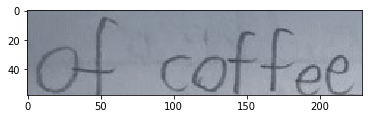

In [3]:
img1 = cv2.imread('IMG_2400_crop.JPG')

plt.imshow(img1)

In [4]:
# result without pre-processing image
print(pytesseract.image_to_string(img1))

91 'chee


In [5]:
img1 = cv2.resize(img1, (0,0), fx=2, fy=2)

ﬂame


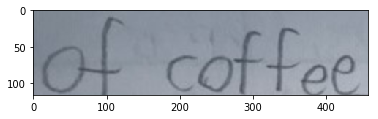

In [6]:
# we see that resizing here does not improve immediate recognition

plt.imshow(img1)

print(pytesseract.image_to_string(img1))

O‘F COfwfee


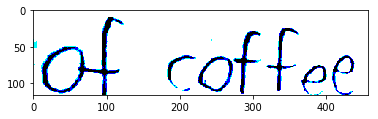

In [7]:
# we see some improvement with using threshold

ret, imgb = cv2.threshold(img1,120,255,cv2.THRESH_BINARY)

print(pytesseract.image_to_string(imgb))

plt.imshow(imgb)

ﬂame


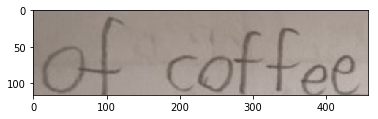

In [8]:
imgb = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

print(pytesseract.image_to_string(imgb))

plt.imshow(imgb)

COTE1£6 8.

Punnwm.

G


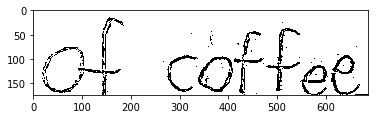

In [9]:
# Adaptive thresh yields better image, but worse recognition

img2 = cv2.imread('IMG_2400_crop.jpg')

imgg = cv2.resize(img2, (0,0), fx=3, fy=3)
imgg = cv2.cvtColor(imgg, cv2.COLOR_BGR2GRAY)
imgg = cv2.medianBlur(imgg, 5)

imgg = cv2.adaptiveThreshold(imgg,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
                             cv2.THRESH_BINARY,5,2)

imgg = cv2.cvtColor(imgg, cv2.COLOR_GRAY2RGB)

print(pytesseract.image_to_string(imgg))

plt.imshow(imgg)

In [10]:
# tuning the config for Tesseract
print(pytesseract.image_to_string(imgg, config='-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz -psm 7'))

Gait COTEWEQ a


El Chatee


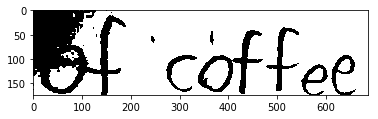

In [11]:
# Otsu threshold yields sharper letters and slightly better recognition

img2 = cv2.imread('IMG_2400_crop.jpg')

imgn = cv2.resize(img2, (0,0), fx=3, fy=3)
imgn = cv2.cvtColor(imgn, cv2.COLOR_BGR2GRAY)
#imgn = cv2.medianBlur(imgn, 5)
imgn = cv2.GaussianBlur(imgn,(5,1),0)
#imgn = cv2.bilateralFilter(imgn,2,50,50)
ret, imgn = cv2.threshold(imgn,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

imgn = cv2.cvtColor(imgn, cv2.COLOR_GRAY2RGB)

print(pytesseract.image_to_string(imgn, config='-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz -psm 7'))

plt.imshow(imgn)

## 2nd test image

Basic recognition: [\Anxxly I l/KN/P E7\I d/Cﬁ


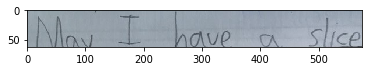

In [12]:
newimg = cv2.imread('IMG_2398_crop.JPG')

print(f'Basic recognition: {pytesseract.image_to_string(newimg)}')

plt.imshow(newimg)

Resize recognition: Mm, I onwo O\- Slim


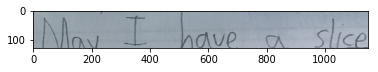

In [13]:
newimg = cv2.resize(newimg, (0,0), fx=2, fy=2)

print(f'Resize recognition: {pytesseract.image_to_string(newimg)}')

plt.imshow(newimg)

In [14]:
newimg = cv2.cvtColor(newimg, cv2.COLOR_BGR2GRAY)

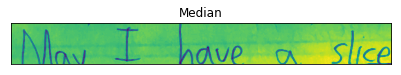

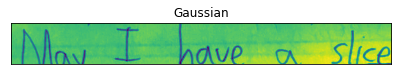

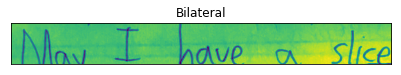

In [15]:
# we don't see a big different for blur type

blurm = cv2.medianBlur(newimg, 5)
blurg = cv2.GaussianBlur(newimg,(5,5),0)
blurb = cv2.bilateralFilter(newimg,5,75,75)

blur_list = [blurm, blurg, blurb]
blur_title = ['Median', 'Gaussian', 'Bilateral']

for i in range(len(blur_list)):
    plt.figure(figsize=(15,15))
    plt.subplot(2,2,i+1).imshow(blur_list[i])
    plt.title(blur_title[i])
    plt.xticks([]),plt.yticks([])

plt.show()

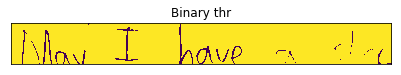

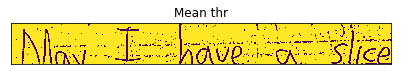

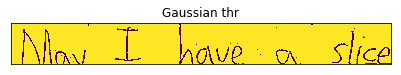

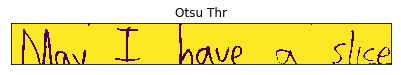

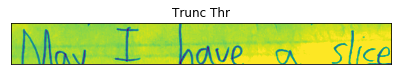

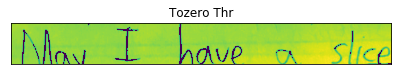

In [16]:
ret1,thr1 = cv2.threshold(blurg,127,255,cv2.THRESH_BINARY)
thr2 = cv2.adaptiveThreshold(blurg,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
thr3 = cv2.adaptiveThreshold(blurg,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,7,2)
ret4, thr4 = cv2.threshold(blurg,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret5, thr5 = cv2.threshold(blurg,175,255,cv2.THRESH_TRUNC)
ret6, thr6 = cv2.threshold(blurg,125,255,cv2.THRESH_TOZERO)

thr_list = [thr1, thr2, thr3, thr4, thr5, thr6]
thr_title = ['Binary thr','Mean thr','Gaussian thr','Otsu Thr','Trunc Thr','Tozero Thr']

for i in range(len(thr_list)):
    plt.figure(figsize=(15,15))
    plt.subplot(3,2,i+1).imshow(thr_list[i])
    plt.title(thr_title[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [17]:
# No results are satisfactory

for i in range(len(thr_list)):
    print(f"{thr_title[i]} output: {pytesseract.image_to_string(thr_list[i],\
          config='-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz -psm 7')}\n")

Binary thr output: MW I MW KM

Mean thr output: 

Gaussian thr output: Mml I onwe a ghge

Otsu Thr output: MWI I LxOWP Qxl SIIQ

Trunc Thr output: hAmII I LxOWP Ox SIIQQ

Tozero Thr output: NMJ I LNOWP Km ny L



In [18]:
# In conclusion for part 1:
# Handwriting with pencil is hard to recognize via Tesseract OCR
# Recognition can likely be improved via:
# 1. Pen versus pencil for clarity
# 2. Overall picture quality improvement
# 3. Parameter tuning for thresholding and Tesseract OCR

## Detour: testing on printed English & Chinese words

write about a cousin.)


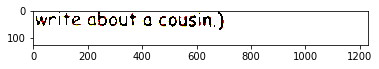

In [19]:
# testing thresh_binary on printed text; successful

img3 = cv2.imread('IMG_2392_crop.jpg')

img3 = cv2.resize(img3, (0,0), fx=5, fy=5)
img3 = cv2.medianBlur(img3, 1)
ret, img3 = cv2.threshold(img3,120,255,cv2.THRESH_BINARY)
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)

print(pytesseract.image_to_string(img3))

plt.imshow(img3)

Output: 无为


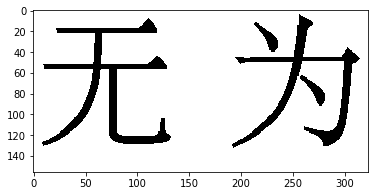

In [20]:
# testing thresh_binary on printed simplified Chinese text; successful

img4 = cv2.imread('chinese_phrase2.png')

img4 = cv2.resize(img4, (0,0), fx=1, fy=1)
img4 = cv2.medianBlur(img4, 1)
ret, img4 = cv2.threshold(img4,120,255,cv2.THRESH_BINARY)
img4 = cv2.cvtColor(img4,cv2.COLOR_BGR2RGB)

print(f"Output: {pytesseract.image_to_string(img4, lang='chi_sim')}")

plt.imshow(img4)

Output: 學


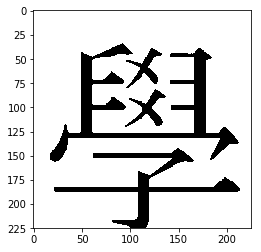

In [21]:
# testing thresh_binary on printed traditional Chinese text; successful

img5 = cv2.imread('IMG_chi2.jpg')

img5 = cv2.resize(img5, (0,0), fx=1, fy=1)
img5 = cv2.medianBlur(img5, 1)
ret, img5 = cv2.threshold(img5,120,255,cv2.THRESH_BINARY)
img5 = cv2.cvtColor(img5,cv2.COLOR_BGR2RGB)

print(f"Output: {pytesseract.image_to_string(img5, lang='chi_tra')}")

plt.imshow(img5)

In [22]:
# This concludes part 1